In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
image= cv2.imread('img5.jpg', 0)

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # for display

(-0.5, 639.5, 967.5, -0.5)

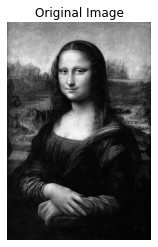

In [4]:
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

In [5]:
# Median Filter
# Using built-in function of cv2
filtered_image = cv2.medianBlur(image, 5)

Text(0.5, 1.0, 'Median Filtering')

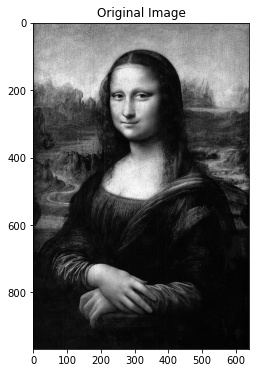

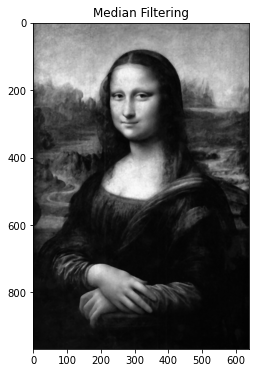

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtering')

In [10]:
# User-defined function
def median_filter(image, kernel_size):
    # Pad the image to handle border pixels
    padded_img = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)

    # Create an empty output image
    output_img = np.zeros_like(image)

    # Apply the median filter
    for i in range(kernel_size//2, padded_img.shape[0] - kernel_size//2):
        for j in range(kernel_size//2, padded_img.shape[1] - kernel_size//2):
            # Extract the neighborhood
            neighborhood = padded_img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]

            # Calculate the median value and assign it to the output image
            output_img[i-kernel_size//2, j-kernel_size//2] = np.median(neighborhood)

    return output_img

In [11]:
# Define the size of the kernel
kernel_size = 3

In [12]:
# Apply the median filter using the user-defined function
filtered_image_user_defined = median_filter(image, kernel_size)

Text(0.5, 1.0, 'Median Filtering')

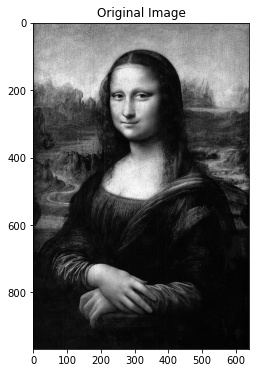

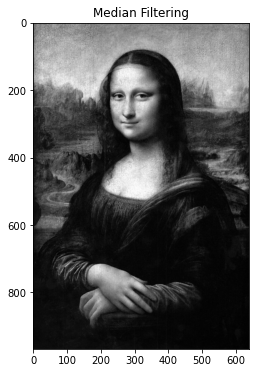

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(filtered_image_user_defined, cv2.COLOR_BGR2RGB))
plt.title('Median Filtering')

In [17]:
# Min-Max filters
# Built-in function using cv2
# Define a kernel for max and min filtering
kernel = np.ones((5, 5), np.uint8)

In [18]:
# Perform Max filter (Dilation)
max_filtered_image = cv2.dilate(image, kernel)

In [19]:
# Perform Min filter (Erosion)
min_filtered_image = cv2.erode(image, kernel)

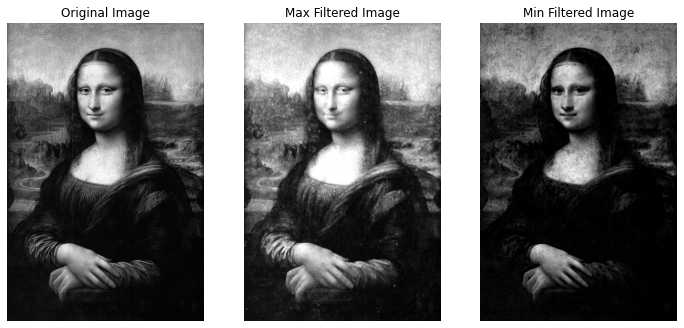

In [20]:
# Display the original, max filtered, and min filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.show()

In [21]:
# User-defined function for MIN filer
def min_filter(img, kernel_size):
    # Pad the image to handle border pixels
    padded_img = cv2.copyMakeBorder(img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)

    # Create an empty output image
    output_img = np.zeros_like(img)

    # Apply the min filter
    for i in range(kernel_size//2, padded_img.shape[0] - kernel_size//2):
        for j in range(kernel_size//2, padded_img.shape[1] - kernel_size//2):
            # Extract the neighborhood
            neighborhood = padded_img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]

            # Calculate the minimum value and assign it to the output image
            output_img[i-kernel_size//2, j-kernel_size//2] = np.min(neighborhood)

    return output_img

In [22]:
# User-defined function for max filter
def max_filter(img, kernel_size):
    # Pad the image to handle border pixels
    padded_img = cv2.copyMakeBorder(img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)

    # Create an empty output image
    output_img = np.zeros_like(img)

    # Apply the max filter
    for i in range(kernel_size//2, padded_img.shape[0] - kernel_size//2):
        for j in range(kernel_size//2, padded_img.shape[1] - kernel_size//2):
            # Extract the neighborhood
            neighborhood = padded_img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]

            # Calculate the maximum value and assign it to the output image
            output_img[i-kernel_size//2, j-kernel_size//2] = np.max(neighborhood)

    return output_img

In [23]:
# Define the size of the kernel
kernel_size = 3

In [24]:
# Apply the min filter using the user-defined function
min_filtered_image = min_filter(image, kernel_size)

In [25]:
# Apply the max filter using the user-defined function
max_filtered_image = max_filter(image, kernel_size)

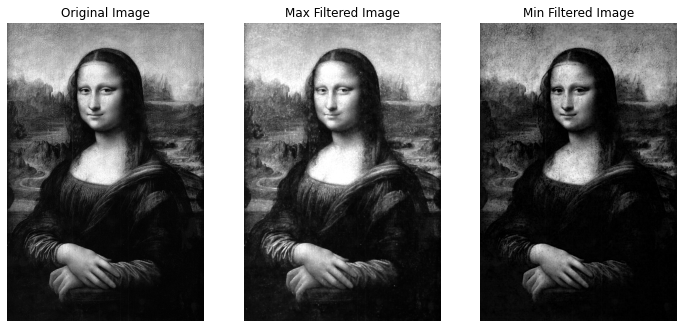

In [26]:
# Display the original, max filtered, and min filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.show()

In [27]:
# Mid-point Filtering
# Using buil-in function
# Define the kernel size for the neighborhood
kernel_size = 3
padding_size = kernel_size // 2

In [28]:
# Pad the image to handle border pixels
padded_image = cv2.copyMakeBorder(image, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_REFLECT)

In [29]:
# Create an empty output image
output_image = np.zeros_like(image)

In [30]:
# Apply midpoint filtering
for i in range(padding_size, padded_image.shape[0] - padding_size):
    for j in range(padding_size, padded_image.shape[1] - padding_size):
        neighborhood = padded_image[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1]
        min_val = np.min(neighborhood)
        max_val = np.max(neighborhood)
        output_image[i-padding_size, j-padding_size] = (min_val + max_val) // 2

<ipython-input-30-43c5986a26a6>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  output_image[i-padding_size, j-padding_size] = (min_val + max_val) // 2


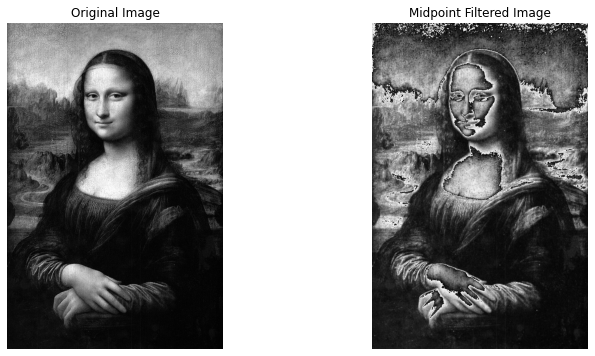

In [31]:
# Display the original and midpoint filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Midpoint Filtered Image')
plt.axis('off')

plt.show()

In [32]:
# Using user-defined function for MIDPOINT filter
def mid_point_filter_user_defined(img, kernel_size):
    # Pad the image to handle border pixels
    padded_img = cv2.copyMakeBorder(img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)

    # Create an empty output image
    output_img = np.zeros_like(img)

    # Apply the mid-point filter
    for i in range(kernel_size//2, padded_img.shape[0] - kernel_size//2):
        for j in range(kernel_size//2, padded_img.shape[1] - kernel_size//2):
            # Extract the neighborhood
            neighborhood = padded_img[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]

            # Calculate the minimum and maximum values
            min_val = np.min(neighborhood)
            max_val = np.max(neighborhood)

            # Calculate the mid-point and assign it to the output image
            output_img[i-kernel_size//2, j-kernel_size//2] = (min_val + max_val) / 2

    return output_img

In [33]:
# Define the size of the kernel
kernel_size = 3

# Apply the mid-point filter using the user-defined function
mid_point_filtered_image_user_defined = mid_point_filter_user_defined(image, kernel_size)

<ipython-input-32-044bcffae0e0>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  output_img[i-kernel_size//2, j-kernel_size//2] = (min_val + max_val) / 2


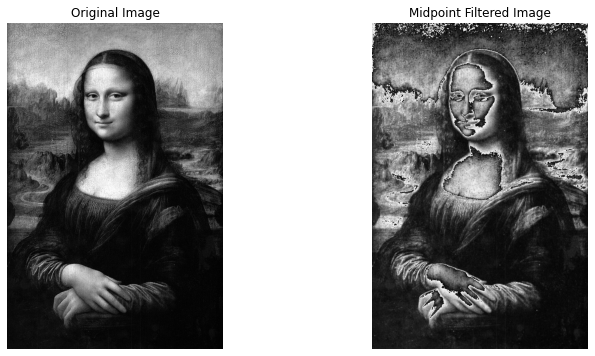

In [34]:
# Display the original and midpoint filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mid_point_filtered_image_user_defined, cmap='gray')
plt.title('Midpoint Filtered Image')
plt.axis('off')

plt.show()

In [38]:
# Alpha-trimmed Filtering
# Using user-defined function for ALPHA TRIMMED MEAN filter
def alpha_trimmed_mean_filter(img, d, alpha):
    # Padding the image to handle border pixels
    padded_img = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_REFLECT)

    # Create an empty output image
    output_img = np.zeros_like(img)

    # Apply the alpha trimmed mean filter
    for i in range(d, padded_img.shape[0] - d):
        for j in range(d, padded_img.shape[1] - d):
            # Extract the neighborhood
            neighborhood = padded_img[i-d:i+d+1, j-d:j+d+1]

            # Flatten the neighborhood and sort the values
            sorted_neighborhood = np.sort(neighborhood.flatten())

            # Compute the alpha trimmed mean
            trimmed_values = sorted_neighborhood[int(alpha/2):-int(alpha/2)]
            output_img[i-d, j-d] = np.mean(trimmed_values)

    return output_img

In [39]:
# Set the size of the neighborhood
d = 3

# Set the alpha value
alpha = 3

In [40]:
# Apply the alpha trimmed mean filter using the user-defined function
filtered_image_user_defined = alpha_trimmed_mean_filter(image, d, alpha)

In [45]:
# Using in-built function
def alpha_trimmed_mean_filter(img, kernel_size, alpha):
    # Apply the alpha trimmed mean filter using the built-in function
    filtered_image = cv2.boxFilter(img, -1, (kernel_size, kernel_size), normalize=False)

    # Calculate the number of pixels to trim
    trim_pixels = int(alpha * (kernel_size ** 2) / 2)

    # Trim the pixels from the filtered image
    trimmed_image = filtered_image.copy()
    for i in range(trim_pixels, img.shape[0] - trim_pixels):
        for j in range(trim_pixels, img.shape[1] - trim_pixels):
            neighborhood = filtered_image[i-trim_pixels:i+trim_pixels+1, j-trim_pixels:j+trim_pixels+1]
            sorted_neighborhood = np.sort(neighborhood.flatten())
            trimmed_image[i, j] = np.mean(sorted_neighborhood)

    return trimmed_image

In [46]:
# Define the size of the kernel
kernel_size = 3

# Define the alpha value
alpha = 0.3

In [47]:
# Apply the alpha trimmed mean filter using the built-in function
filtered_image_builtin = alpha_trimmed_mean_filter(image, kernel_size, alpha)

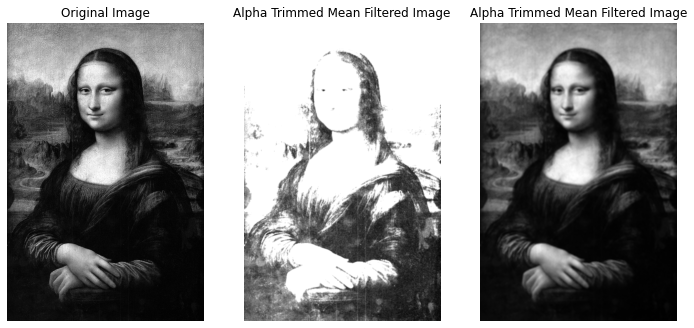

In [48]:
# Display the original and midpoint filtered images using matplotlib
plt.figure(figsize=(12, 9))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_builtin, cmap='gray')
plt.title('Alpha Trimmed Mean Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_user_defined, cmap='gray')
plt.title('Alpha Trimmed Mean Filtered Image')
plt.axis('off')

plt.show()